In [1]:
#Restaurants delivering Online or not

#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

##Display all the columns of the dataframe
pd.pandas.set_option("display.max_columns",None)

In [2]:
zomato = pd.read_csv('zomato.csv')

##print shape of the dataset with rows and columns
print(zomato.shape)

(51717, 17)


In [3]:
zomato_real=zomato.drop(['url',"phone","dish_liked",'address',"reviews_list"], axis = 1)

In [4]:
#Remove the NaN values from the dataset
zomato_real.isnull().sum()
zomato_real.dropna(how='any',inplace=True)
zomato_real.info() #.info() function is used to get a concise summary of the dataf

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43533 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         43533 non-null  object
 1   online_order                 43533 non-null  object
 2   book_table                   43533 non-null  object
 3   rate                         43533 non-null  object
 4   votes                        43533 non-null  int64 
 5   location                     43533 non-null  object
 6   rest_type                    43533 non-null  object
 7   cuisines                     43533 non-null  object
 8   approx_cost(for two people)  43533 non-null  object
 9   menu_item                    43533 non-null  object
 10  listed_in(type)              43533 non-null  object
 11  listed_in(city)              43533 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.3+ MB


In [5]:
zomato_real.duplicated().sum()
zomato_real.drop_duplicates(inplace=True)
zomato_real.head()
zomato_real.shape

(43464, 12)

In [6]:
zomato_real.rename(columns={"approx_cost(for two people)":'cost','listed_in(type)':'type', 'listed_in(city)':'city'}, inplace=True)

In [7]:
zomato_real['cost'] = zomato_real['cost'].str.replace(',','')
zomato_real['cost']=zomato_real['cost'].astype(float)

In [8]:
zomato_real = zomato_real.loc[zomato_real.rate !='NEW']

In [9]:
zomato_real = zomato_real.loc[zomato_real.rate !='-'].reset_index(drop=True)

In [10]:
rate=zomato_real.rate.str.split("/",n = 1, expand = True)
zomato_real['rate']=rate[0]

# Data vizualization

In [11]:
#Restaurants delivering Online or not

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure

output_file("Restaurants delivering Online or not.html")


book_table = zomato_real['book_table'].unique()
count=zomato_real['book_table'].value_counts()
counts = count.to_list()
counts
source = ColumnDataSource(data=dict(book_table=book_table, counts=counts, color=Spectral6))

p = figure(x_range=book_table, y_range=(0,counts[0]+10), plot_height=250, title="book_table counts",
           toolbar_location=None, tools="")

p.vbar(x='book_table', top='counts', width=0.9, color='color', source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

C:\Users\Khowsalya\Anaconda3\lib\site-packages\bokeh\models\plots.py:756: UserWarning: 
You are attempting to set `plot.legend.orientation` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with the 'legend' parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
C:\Users\Khowsalya\Anaconda3\lib\site-packages\bokeh\models\plots.py:756: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with the 'legend' parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


In [12]:
#Restaurants allowing table booking or not
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure

output_file("Restaurants allowing table booking or not.html")


orders = zomato_real['online_order'].unique()
count=zomato_real['online_order'].value_counts()
counts = count.to_list()

source = ColumnDataSource(data=dict(orders=orders, counts=counts, color=Spectral6))

p = figure(x_range=orders, y_range=(0,30000), plot_height=250, title="orders counts",
           toolbar_location=None, tools="")

p.vbar(x='orders', top='counts', width=0.9, color='color', source=source)

p.xgrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

book_table        No       Yes
rate                          
1.8         1.000000  0.000000
1.8         1.000000  0.000000
2.0         1.000000  0.000000
2.0         1.000000  0.000000
2.1         1.000000  0.000000
...              ...       ...
4.7         0.325581  0.674419
4.8         0.434783  0.565217
4.8         0.302326  0.697674
4.9         0.320000  0.680000
4.9         0.233333  0.766667

[62 rows x 2 columns]


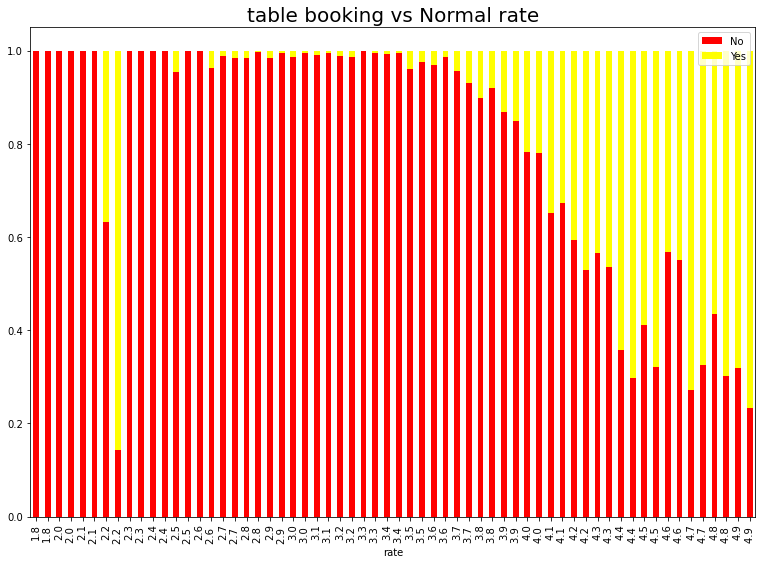

In [13]:
#Table booking Rate vs Normal Rate

plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(zomato_real['rate'], zomato_real['book_table'])
#showing percentage of yes or no in table booking as per rate ...in rate 4.7 there is 32% no and 67% yes
print(Y.div(Y.sum(1).astype(float), axis = 0))

#graph is for 100%
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs Normal rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

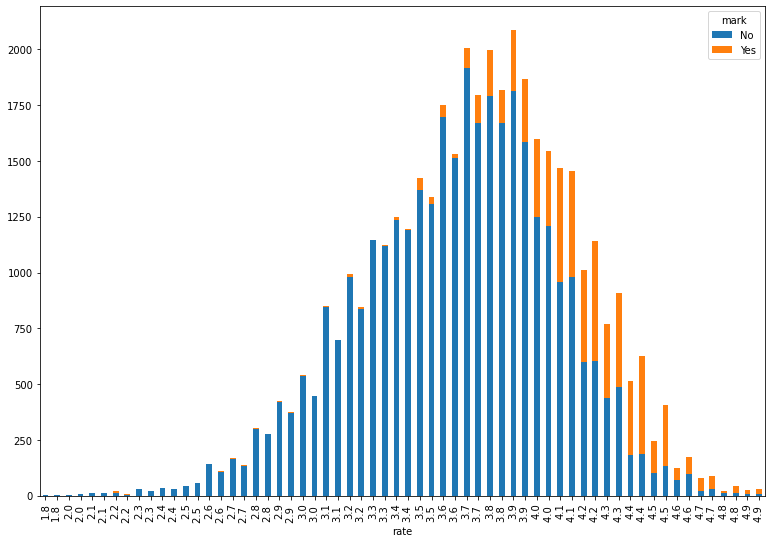

In [14]:
##Table booking Rate vs Normal Rate ----- this is for count of no and yes in rating 4.7 has these many no and yes
ct = pd.crosstab(zomato_real.rate, zomato_real.book_table)

ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Location wise count for restaurants')

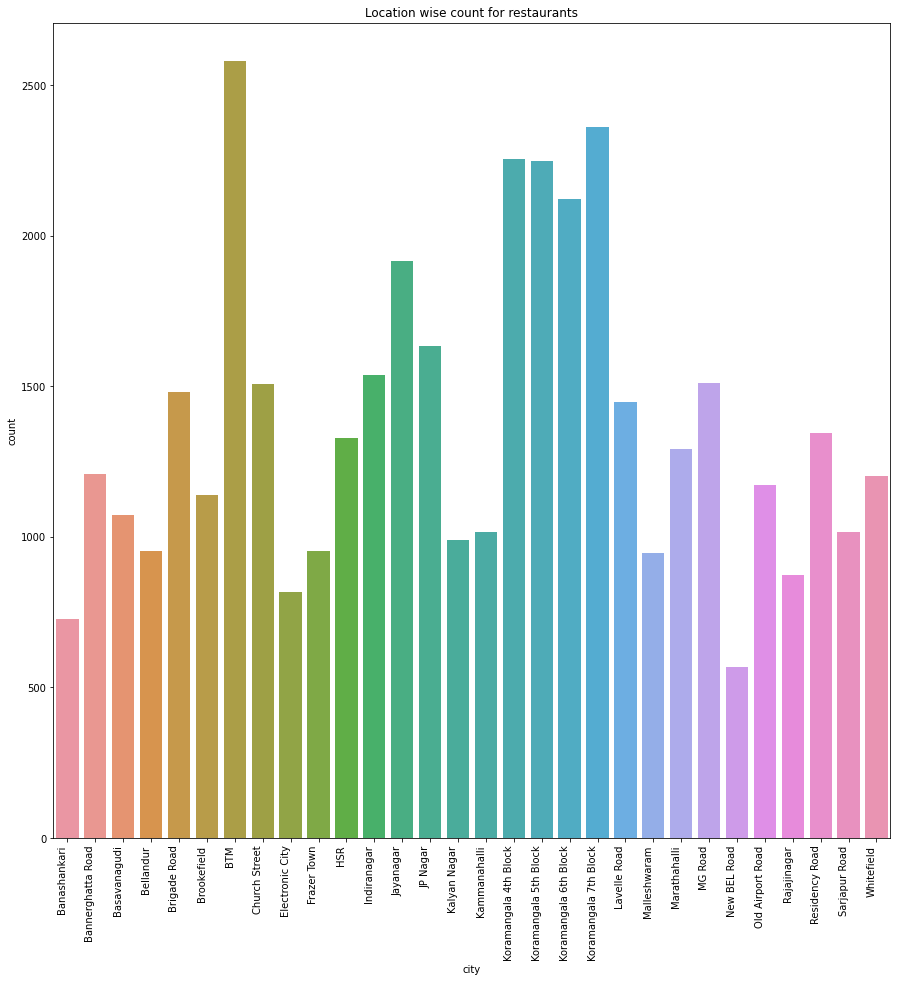

In [82]:
#Best Location
sns.countplot(zomato_real['city'])
#xticklabel for making horizontal name display of city into vertical
sns.countplot(zomato_real['city']).set_xticklabels(sns.countplot(zomato_real['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Location wise count for restaurants')

In [15]:
#Table booking Rate vs Normal Rate

plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(zomato_real['rate'], zomato_real['city'])
#showing percentage of yes or no in table booking as per rate ...in rate 4.7 there is 32% no and 67% yes
# print(Y.div(Y.sum(1).astype(float), axis = 0))

# #graph is for 100%
# Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
# plt.title('Relation between Location and Rating', fontweight = 30, fontsize = 20)
# plt.legend(loc="upper right")
# plt.show()
Y

city,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,HSR,Indiranagar,JP Nagar,Jayanagar,Kalyan Nagar,Kammanahalli,Koramangala 4th Block,Koramangala 5th Block,Koramangala 6th Block,Koramangala 7th Block,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
rate,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.8,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
2.0,0,0,0,0,0,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,2,0,0,0,2,0,0
2.1,0,0,0,0,2,1,4,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,14,11,12,5,6,3,4,4,6,0,1,2,9
4.8,5,0,0,1,3,0,2,0,0,1,0,3,0,1,2,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0
4.8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,5,4,5,0,0,5,8,0,3,7,0,0,3


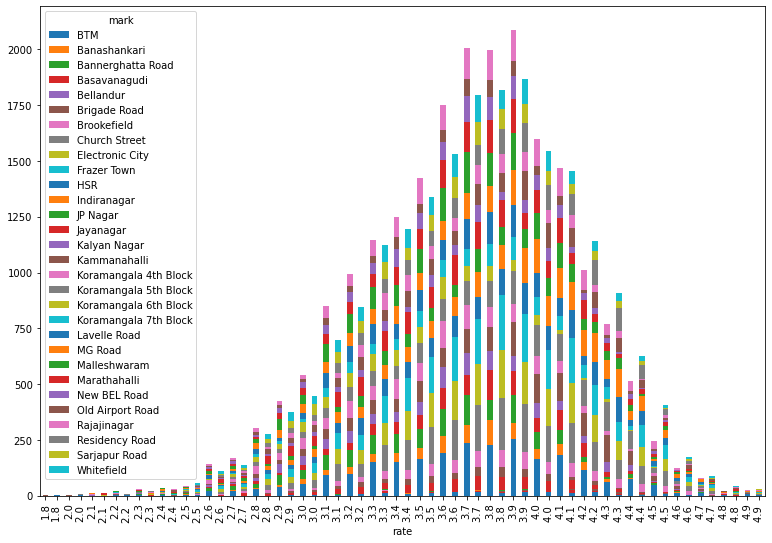

In [16]:
##Table booking Rate vs Normal Rate ----- this is for count of no and yes in rating 4.7 has these many no and yes
ct = pd.crosstab(zomato_real.rate, zomato_real.city)

ct.plot.bar(stacked=True)
plt.legend(title='mark')

plt.show()

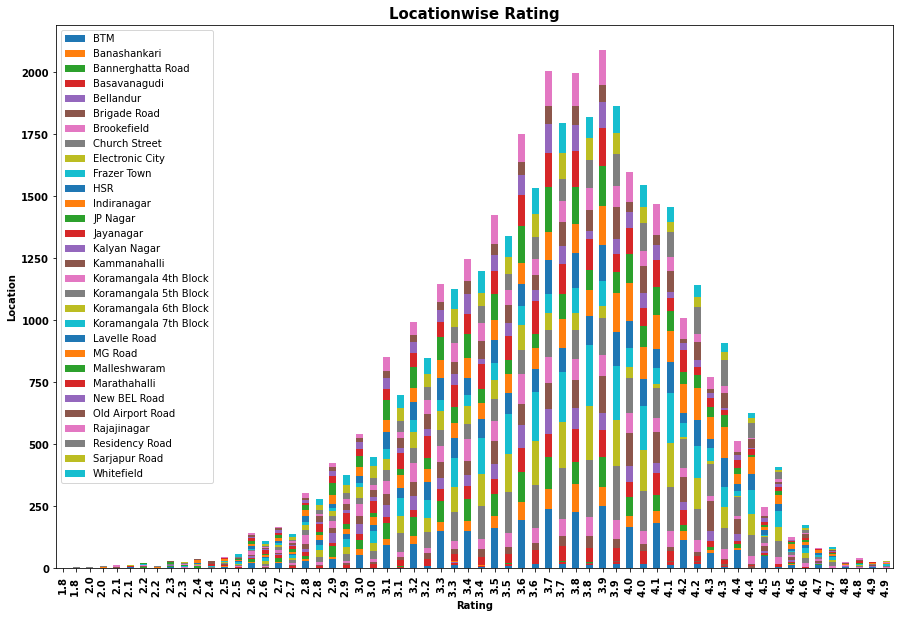

In [27]:
plt.rcParams['figure.figsize'] = (15, 10)
loc_plt=pd.crosstab(zomato_real['rate'],zomato_real['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Locationwise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend();

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Restuarant Type count')

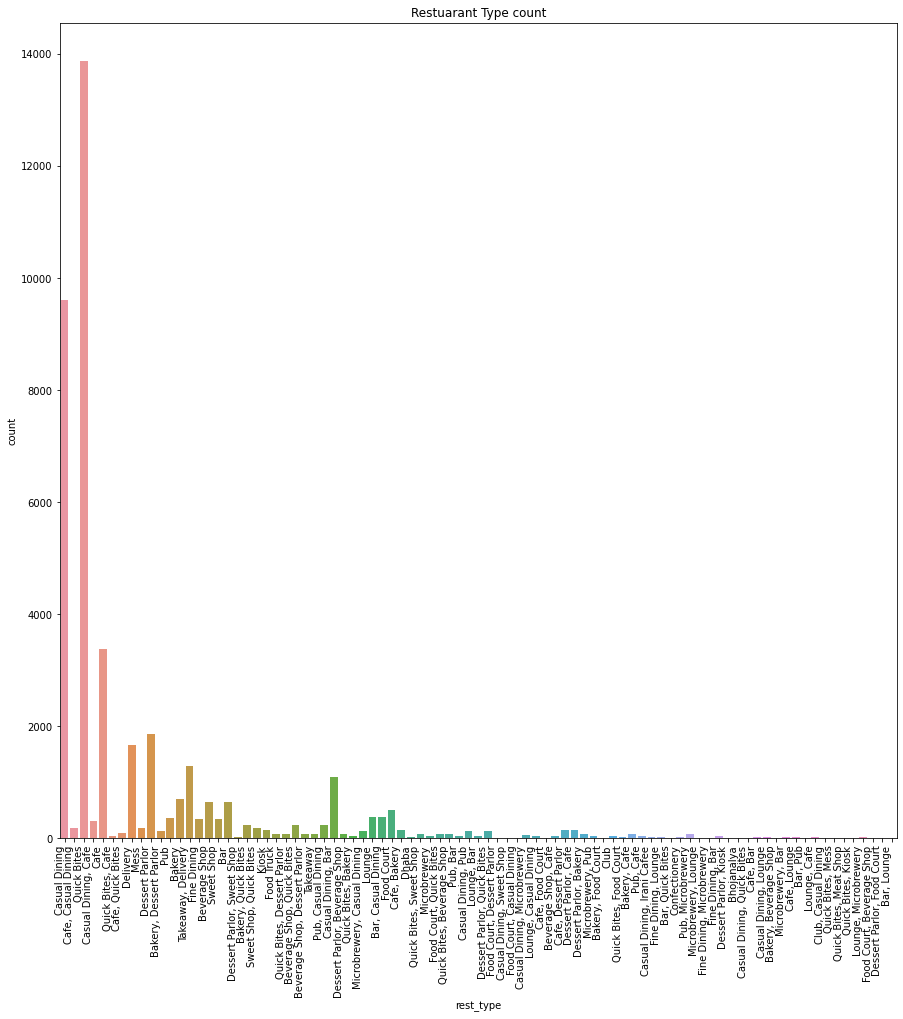

In [20]:
#Restaurant Type
sns.countplot(zomato_real['rest_type'])
#xticklabel for making horizontal name display of city into vertical
sns.countplot(zomato_real['rest_type']).set_xticklabels(sns.countplot(zomato_real['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type count')

In [21]:
Y = pd.crosstab(zomato_real['rest_type'], zomato_real['city'])

In [22]:
Y

city,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,HSR,Indiranagar,JP Nagar,Jayanagar,Kalyan Nagar,Kammanahalli,Koramangala 4th Block,Koramangala 5th Block,Koramangala 6th Block,Koramangala 7th Block,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
rest_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bakery,39,15,17,23,33,21,23,22,19,30,27,27,23,23,17,27,29,30,29,33,18,28,12,23,9,23,9,18,27,30
"Bakery, Beverage Shop",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Bakery, Cafe",1,0,0,0,0,6,5,6,0,4,3,8,0,0,0,1,1,0,0,0,6,7,1,1,1,6,0,6,0,9
"Bakery, Dessert Parlor",5,2,0,0,7,6,3,4,0,1,7,6,2,2,5,5,10,6,8,6,4,4,6,2,2,4,7,4,7,2
"Bakery, Food Court",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Quick Bites, Sweet Shop",9,0,1,0,4,1,3,1,3,1,3,2,3,3,0,0,6,6,6,6,0,1,1,6,1,1,0,0,6,1
Sweet Shop,22,13,9,14,4,9,16,10,4,9,9,7,15,19,1,1,24,22,20,21,10,9,16,13,3,6,14,9,5,12
"Sweet Shop, Quick Bites",8,5,3,9,4,6,3,6,0,8,3,5,5,12,7,6,8,6,6,8,7,6,4,2,6,1,6,8,6,7


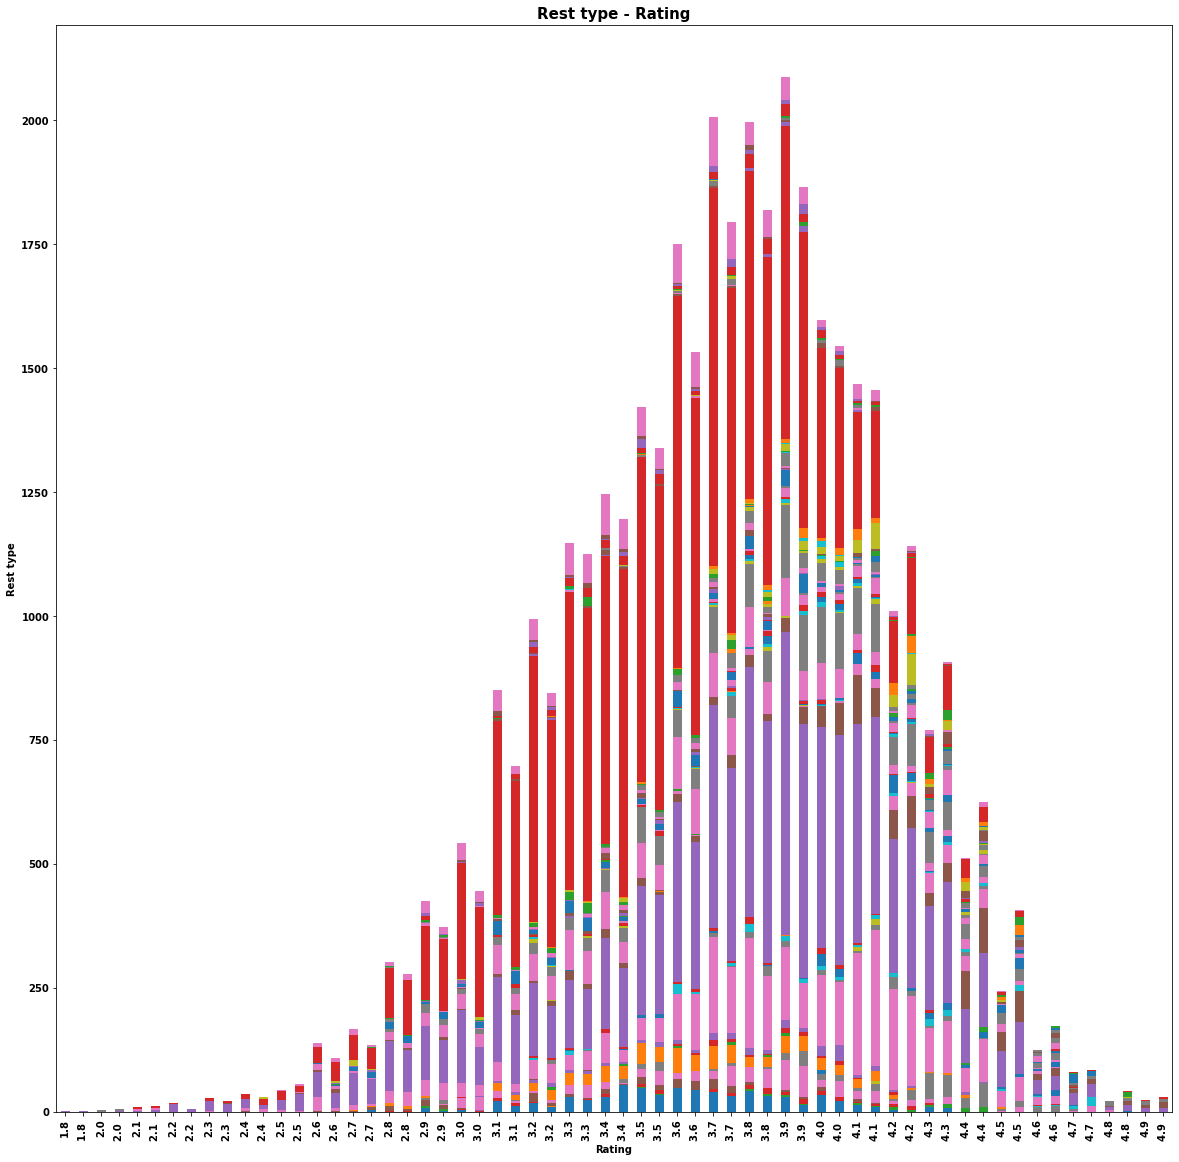

In [29]:
#Gaussian Rest type and Rating
plt.rcParams['figure.figsize'] = (20, 20)
loc_plt=pd.crosstab(zomato_real['rate'],zomato_real['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Type of Service')

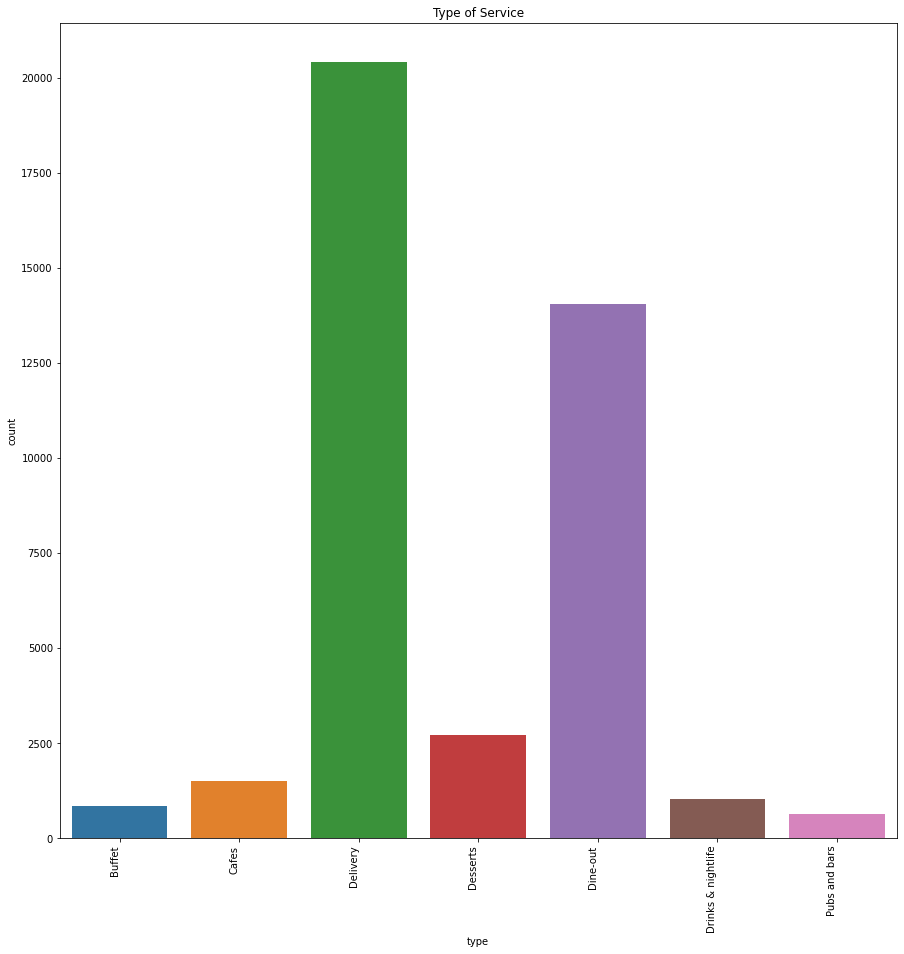

In [30]:
# Types of Services
sns.countplot(zomato_real['type'])
sns.countplot(zomato_real['type']).set_xticklabels(sns.countplot(zomato_real['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

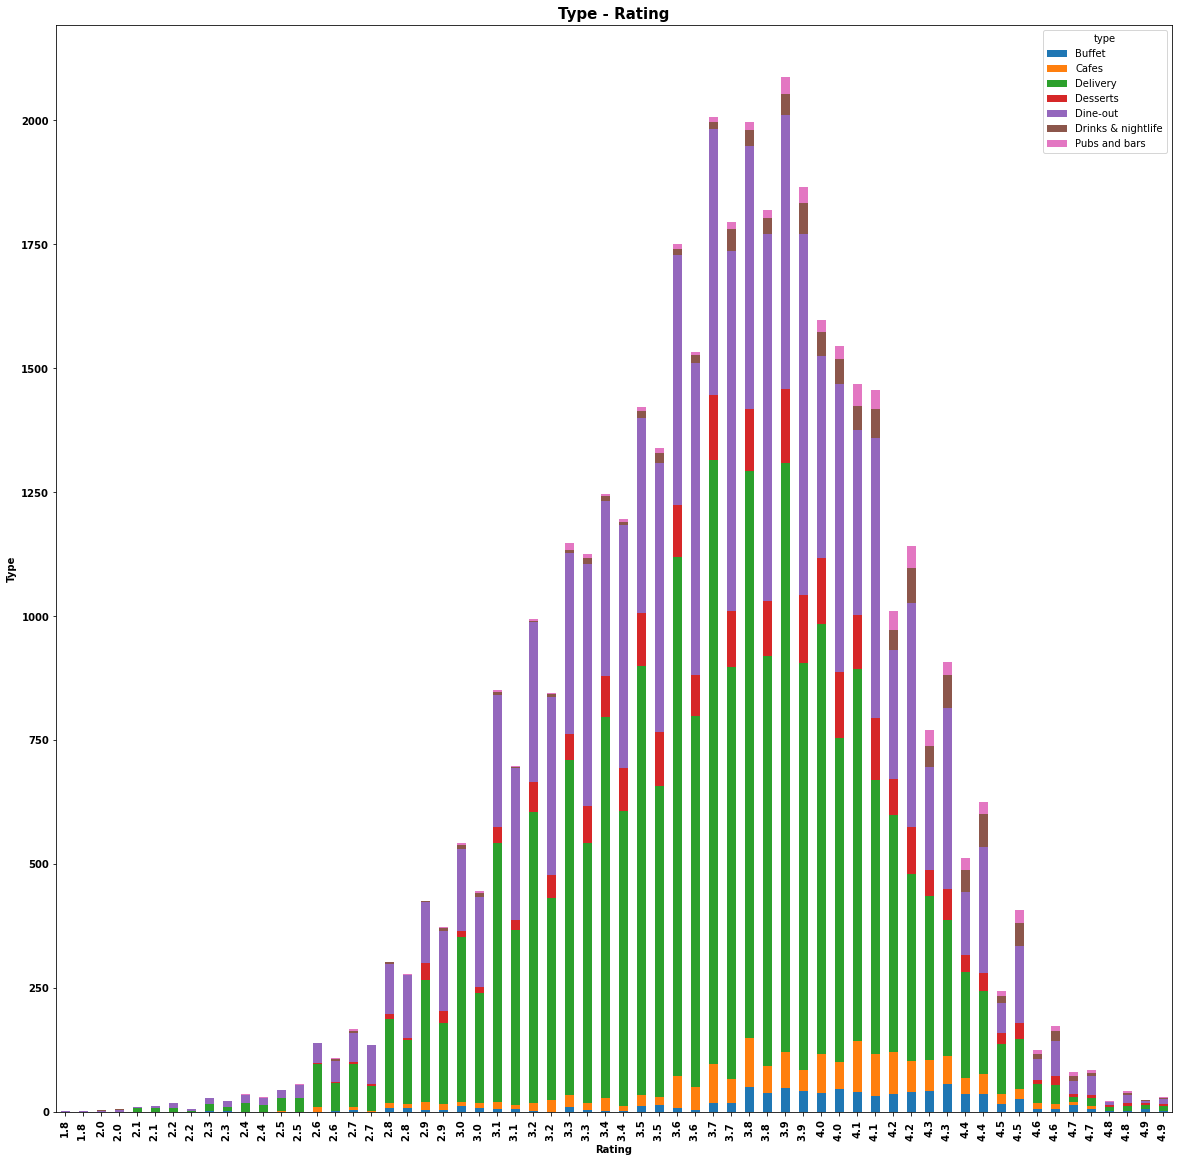

In [32]:
# Type and Rating
type_plt=pd.crosstab(zomato_real['rate'],zomato_real['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cost of Restuarant')

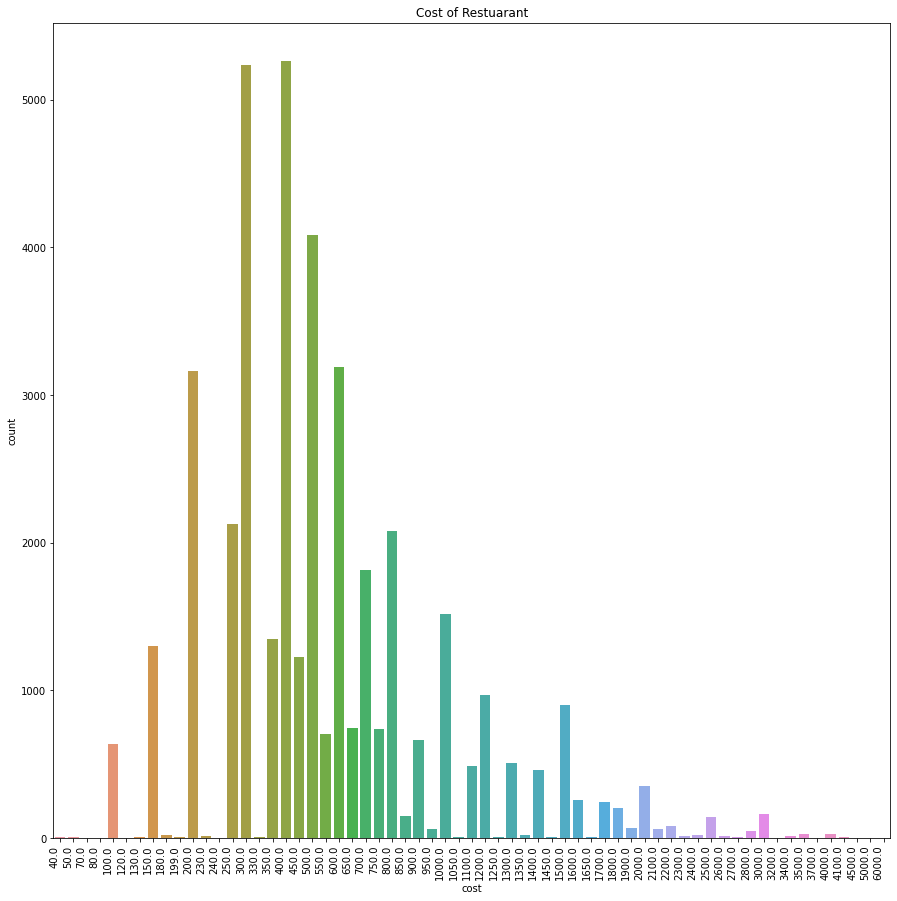

In [33]:
sns.countplot(zomato_real['cost'])
sns.countplot(zomato_real['cost']).set_xticklabels(sns.countplot(zomato_real['cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Khowsalya\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cost of Restuarant')

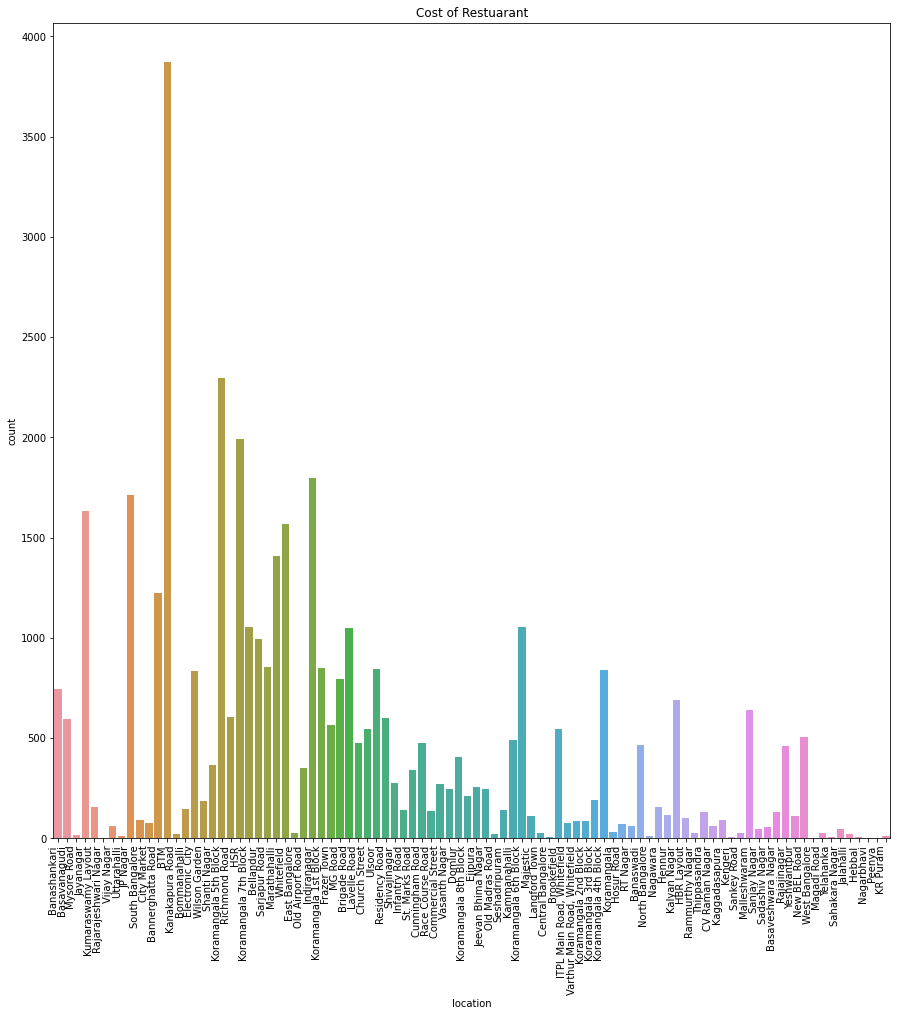

In [35]:
sns.countplot(zomato_real['location'])
sns.countplot(zomato_real['location']).set_xticklabels(sns.countplot(zomato_real['location']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

Text(0.5, 0, 'Number of outlets')

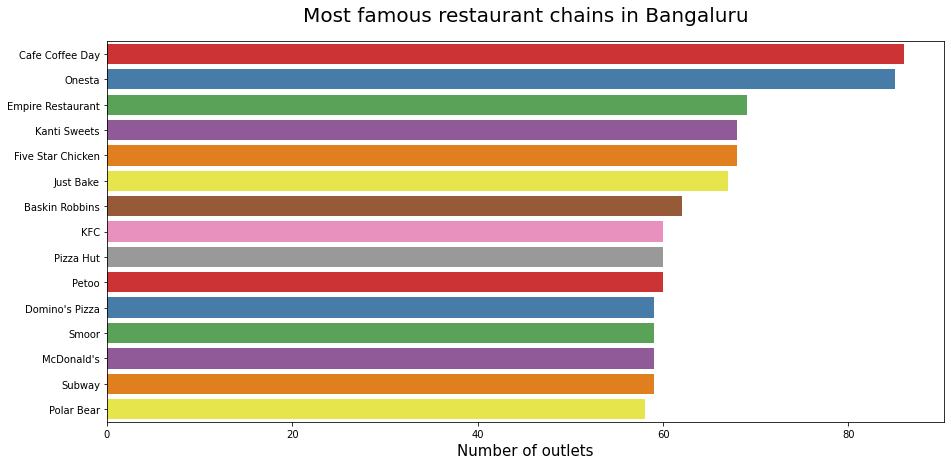

In [41]:
plt.figure(figsize=(15,7))
chains=zomato_real['name'].value_counts()[:15]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

In [40]:
chains[0:15]

Cafe Coffee Day      86
Onesta               85
Empire Restaurant    69
Kanti Sweets         68
Five Star Chicken    68
Just Bake            67
Baskin Robbins       62
KFC                  60
Pizza Hut            60
Petoo                60
Domino's Pizza       59
Smoor                59
McDonald's           59
Subway               59
Polar Bear           58
Name: name, dtype: int64

In [42]:
!pip install sweetviz

You should consider upgrading via the 'c:\users\khowsalya\anaconda3\python.exe -m pip install --upgrade pip' command.


In [43]:
import sweetviz as sv

my_report = sv.analyze(zomato_real)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [44]:
!pip install pandas-profiling

You should consider upgrading via the 'c:\users\khowsalya\anaconda3\python.exe -m pip install --upgrade pip' command.


In [45]:
from pandas_profiling import ProfileReport

In [46]:
profile = ProfileReport(zomato_real, title='Pandas Profiling Report', explorative=True)

In [47]:
profile

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
pip install pandas-visual-analysis

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Khowsalya\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [49]:
from pandas_visual_analysis import VisualAnalysis
VisualAnalysis(zomato_real)

In [50]:
!pip install dtale

  Created wheel for dash: filename=dash-1.20.0-py3-none-any.whl size=85836 sha256=1ef9530c70aab84670ef8dd46cf4aaa90c82d8d43c18478d8b159a2da88e537c
  Stored in directory: c:\users\khowsalya\appdata\local\pip\cache\wheels\4f\c3\6a\a7cb9cedfdf93e0f0e8db0817ff2646d319afa9e4ca543ef9c
  Created wheel for dash-core-components: filename=dash_core_components-1.16.0-py3-none-any.whl size=3540996 sha256=85366ac9ec585f85e0fc108eb17769370a0c9687e509876d55433c6b58d05a3b
  Stored in directory: c:\users\khowsalya\appdata\local\pip\cache\wheels\6a\50\7e\c440176e48ba46baa157b0f10365f6871acd133460b4e0abe4
  Created wheel for dash-html-components: filename=dash_html_components-1.1.3-py3-none-any.whl size=319476 sha256=a41205d4656490956d3f46457829b5a5f7b47ad779c10b76381910b9680f66aa
  Stored in directory: c:\users\khowsalya\appdata\local\pip\cache\wheels\7d\75\be\b836bd1c1f92c4823fef293f82375ca448c1fc627ce50acff0
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-py3-none-any.whl size=1014880 

You should consider upgrading via the 'c:\users\khowsalya\anaconda3\python.exe -m pip install --upgrade pip' command.


In [53]:
import dtale

In [ ]:
dtale.show(zomato_real)